# Contenido

1. Dependencias
2. Datos
3. Modelo

### 1. Dependencias

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures


### 2.Datos

In [7]:
df = pd.read_excel("Datos.xlsx")
df.head()

,Trimestre,LY_CO,LPC_CO,RS_CO,LS_CO,U_CO
0,1994-Q1,NaN,NaN,NaN,670.870660,NaN
1,1994-Q2,NaN,NaN,NaN,670.886522,NaN
2,1994-Q3,NaN,NaN,NaN,673.578001,NaN
3,1994-Q4,NaN,NaN,NaN,672.295465,NaN
4,1995-Q1,NaN,317.040046,NaN,678.018324,NaN


- indice pib
- indice precios al consumidor
- tasa politica monetaria
- tasa de cambia
- tasa de desempelo -> variable dependiente

In [8]:
#Datos nulos

df.isna().sum()

Trimestre    0
LY_CO        9
LPC_CO       4
RS_CO        5
LS_CO        0
U_CO         8
dtype: int64

In [10]:
#dataset final

df.dropna(inplace=True)
df

,Trimestre,LY_CO,LPC_CO,RS_CO,LS_CO,U_CO
8,1996-Q1,395.368943,336.522682,35.00,695.503955,9.341077
9,1996-Q2,395.805800,341.766285,35.00,697.516156,10.140892
10,1996-Q3,396.163133,346.723151,35.00,693.250643,11.439276
11,1996-Q4,396.434825,351.522224,33.00,691.307112,11.544240
12,1997-Q1,396.161955,355.928620,28.50,696.591097,11.231677
...,...,...,...,...,...,...
105,2020-Q2,452.504414,480.164741,2.75,823.188430,20.402384
106,2020-Q3,461.412993,480.526091,1.75,826.331720,17.607324
107,2020-Q4,467.282883,480.853275,1.75,814.104414,15.525437
108,2021-Q1,470.320393,481.391457,1.75,822.601435,14.118250


In [11]:
df.shape

(102, 6)

In [17]:
df.drop(columns=["Trimestre"],inplace=True)

In [19]:
df.head()

,LY_CO,LPC_CO,RS_CO,LS_CO,U_CO
8,395.368943,336.522682,35.0,695.503955,9.341077
9,395.805800,341.766285,35.0,697.516156,10.140892
10,396.163133,346.723151,35.0,693.250643,11.439276
11,396.434825,351.522224,33.0,691.307112,11.544240
12,396.161955,355.928620,28.5,696.591097,11.231677


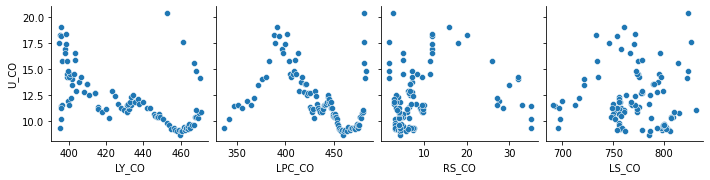

In [20]:
#Graficos de dispersión

sns.pairplot(df,x_vars=["LY_CO","LPC_CO","RS_CO","LS_CO"],y_vars="U_CO")

In [27]:
corr_matrix =df.corr(method="pearson")
corr_matrix

,LY_CO,LPC_CO,RS_CO,LS_CO,U_CO
LY_CO,1.000000,0.924598,-0.644993,0.568730,-0.578655
LPC_CO,0.924598,1.000000,-0.859460,0.765641,-0.382275
RS_CO,-0.644993,-0.859460,1.000000,-0.752345,0.174544
LS_CO,0.568730,0.765641,-0.752345,1.000000,0.017752
U_CO,-0.578655,-0.382275,0.174544,0.017752,1.000000


<AxesSubplot:>

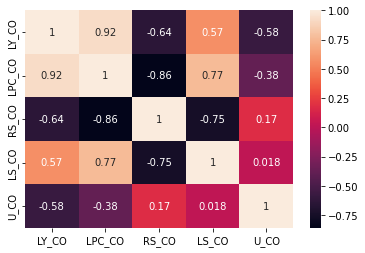

In [29]:
sns.heatmap(corr_matrix,annot=True)

### 3.Modelo

In [31]:
#Declaracion de variables

X = df.drop(columns=['U_CO'])
y = df['U_CO']

In [38]:
# Particion de los datos

X_train, X_test, y_train, y_test  = train_test_split(X,y, random_state=111, test_size=0.3)

In [39]:
# Regresión Lineal

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred = linear_model.predict(X_test)

In [52]:
#coeficientes
linear_model.coef_

array([-0.217675  ,  0.17124439,  0.28356797,  0.01756902])

In [53]:
#intercepto
linear_model.intercept_

15.884667426594019

In [60]:
print("**** Coeficientes e intercepto del modelo ****")
print(f"Intercepto: {linear_model.intercept_:.4}")
print(f"LY_CO: {linear_model.coef_[0]:.4f}")
print(f"LPC_CO: {linear_model.coef_[1]:.4f}")
print(f"RS_CO: {linear_model.coef_[2]:.4f}")
print(f"LS_CO: {linear_model.coef_[3]:.4f}")


**** Coeficientes e intercepto del modelo ****
Intercepto: 15.88
LY_CO: -0.2177
LPC_CO: 0.1712
RS_CO: 0.2836
LS_CO: 0.0176


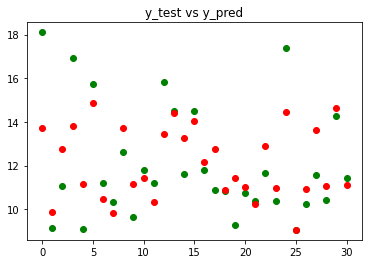

In [67]:
plt.plot(np.array(y_test),"o",linewidth=3, color="g")
plt.plot(y_pred,"o",linewidth=3,color="r")
plt.title("y_test vs y_pred")
plt.show()

### 4.Metricas de evaluación

In [73]:
#MSE

print(f"MSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"RMSE: {mean_squared_error(y_test,y_pred)}")
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"R2: {r2_score(y_test,y_pred)}")

MSE: 1.553971181576765
RMSE: 2.4148264331710867
MAE: 1.1689610223998534
R2: 0.6181447411123191


In [74]:
transformation = PolynomialFeatures(degree=2)
x_pol = transformation.fit_transform(X)
x_pol

array([[1.00000000e+00, 3.95368943e+02, 3.36522682e+02, ...,
        1.22500000e+03, 2.43426384e+04, 4.83725751e+05],
       [1.00000000e+00, 3.95805800e+02, 3.41766285e+02, ...,
        1.22500000e+03, 2.44130655e+04, 4.86528788e+05],
       [1.00000000e+00, 3.96163133e+02, 3.46723151e+02, ...,
        1.22500000e+03, 2.42637725e+04, 4.80596454e+05],
       ...,
       [1.00000000e+00, 4.67282883e+02, 4.80853275e+02, ...,
        3.06250000e+00, 1.42468272e+03, 6.62765997e+05],
       [1.00000000e+00, 4.70320393e+02, 4.81391457e+02, ...,
        3.06250000e+00, 1.43955251e+03, 6.76673120e+05],
       [1.00000000e+00, 4.68027766e+02, 4.82274385e+02, ...,
        3.06250000e+00, 1.44047544e+03, 6.77541055e+05]])